In [ ]:
# @misc{deepseekai2024deepseekv3technicalreport,
#       title={DeepSeek-V3 Technical Report},
#       author={DeepSeek-AI and Aixin Liu and Bei Feng and Bing Xue and Bingxuan Wang and Bochao Wu and Chengda Lu and Chenggang Zhao and Chengqi Deng and Chenyu Zhang and Chong Ruan and Damai Dai and Daya Guo and Dejian Yang and Deli Chen and Dongjie Ji and Erhang Li and Fangyun Lin and Fucong Dai and Fuli Luo and Guangbo Hao and Guanting Chen and Guowei Li and H. Zhang and Han Bao and Hanwei Xu and Haocheng Wang and Haowei Zhang and Honghui Ding and Huajian Xin and Huazuo Gao and Hui Li and Hui Qu and J. L. Cai and Jian Liang and Jianzhong Guo and Jiaqi Ni and Jiashi Li and Jiawei Wang and Jin Chen and Jingchang Chen and Jingyang Yuan and Junjie Qiu and Junlong Li and Junxiao Song and Kai Dong and Kai Hu and Kaige Gao and Kang Guan and Kexin Huang and Kuai Yu and Lean Wang and Lecong Zhang and Lei Xu and Leyi Xia and Liang Zhao and Litong Wang and Liyue Zhang and Meng Li and Miaojun Wang and Mingchuan Zhang and Minghua Zhang and Minghui Tang and Mingming Li and Ning Tian and Panpan Huang and Peiyi Wang and Peng Zhang and Qiancheng Wang and Qihao Zhu and Qinyu Chen and Qiushi Du and R. J. Chen and R. L. Jin and Ruiqi Ge and Ruisong Zhang and Ruizhe Pan and Runji Wang and Runxin Xu and Ruoyu Zhang and Ruyi Chen and S. S. Li and Shanghao Lu and Shangyan Zhou and Shanhuang Chen and Shaoqing Wu and Shengfeng Ye and Shengfeng Ye and Shirong Ma and Shiyu Wang and Shuang Zhou and Shuiping Yu and Shunfeng Zhou and Shuting Pan and T. Wang and Tao Yun and Tian Pei and Tianyu Sun and W. L. Xiao and Wangding Zeng and Wanjia Zhao and Wei An and Wen Liu and Wenfeng Liang and Wenjun Gao and Wenqin Yu and Wentao Zhang and X. Q. Li and Xiangyue Jin and Xianzu Wang and Xiao Bi and Xiaodong Liu and Xiaohan Wang and Xiaojin Shen and Xiaokang Chen and Xiaokang Zhang and Xiaosha Chen and Xiaotao Nie and Xiaowen Sun and Xiaoxiang Wang and Xin Cheng and Xin Liu and Xin Xie and Xingchao Liu and Xingkai Yu and Xinnan Song and Xinxia Shan and Xinyi Zhou and Xinyu Yang and Xinyuan Li and Xuecheng Su and Xuheng Lin and Y. K. Li and Y. Q. Wang and Y. X. Wei and Y. X. Zhu and Yang Zhang and Yanhong Xu and Yanhong Xu and Yanping Huang and Yao Li and Yao Zhao and Yaofeng Sun and Yaohui Li and Yaohui Wang and Yi Yu and Yi Zheng and Yichao Zhang and Yifan Shi and Yiliang Xiong and Ying He and Ying Tang and Yishi Piao and Yisong Wang and Yixuan Tan and Yiyang Ma and Yiyuan Liu and Yongqiang Guo and Yu Wu and Yuan Ou and Yuchen Zhu and Yuduan Wang and Yue Gong and Yuheng Zou and Yujia He and Yukun Zha and Yunfan Xiong and Yunxian Ma and Yuting Yan and Yuxiang Luo and Yuxiang You and Yuxuan Liu and Yuyang Zhou and Z. F. Wu and Z. Z. Ren and Zehui Ren and Zhangli Sha and Zhe Fu and Zhean Xu and Zhen Huang and Zhen Zhang and Zhenda Xie and Zhengyan Zhang and Zhewen Hao and Zhibin Gou and Zhicheng Ma and Zhigang Yan and Zhihong Shao and Zhipeng Xu and Zhiyu Wu and Zhongyu Zhang and Zhuoshu Li and Zihui Gu and Zijia Zhu and Zijun Liu and Zilin Li and Ziwei Xie and Ziyang Song and Ziyi Gao and Zizheng Pan},
#       year={2024},
#       eprint={2412.19437},
#       archivePrefix={arXiv},
#       primaryClass={cs.CL},
#       url={https://arxiv.org/abs/2412.19437},
# }

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict


import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils.class_weight import compute_class_weight

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# dataset = pd.read_csv('out3.csv')
# dataset

train_data = pd.read_csv('train.csv')
validation_data = pd.read_csv('validation.csv')
test_data = pd.read_csv('test.csv')

print(train_data.shape)
print(validation_data.shape)
print(test_data.shape)

(64112, 2)
(8014, 2)
(4453, 2)


In [ ]:
print(train_data.head())
print(validation_data.head())
print(test_data.head())

                                                text  labels
0                              That's [NAME] for ya'       4
1  Huh. Similar things happen to me. Just my big ...       6
2                        This guy sports entertains.       3
3  Nailed it all I do is giving words but all you...       4
4  Because real socialism is fawning over rich ca...       4
                                                text  labels
0  And when guys your age are getting to be too o...       4
1  No seriously, the is a Java.net library. part ...       4
2  “My Girlfriend, [NAME] has returned! Greetings...       3
3  Source each of these and trend lines from prev...       0
4                           Sounds like a great chap       3
                                                text  labels
0   Then let's leave society and start a better one.       4
1  I agree. I’d love to keep [NAME] around but re...       3
2  No problem here, as long as neither one of you...       0
3  Well someone posted t

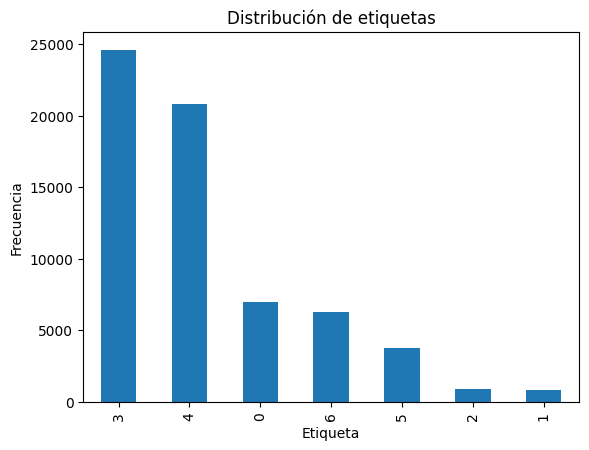

In [ ]:
distribution = train_data['labels'].value_counts()
distribution.plot(kind='bar')
plt.title('Distribución de etiquetas')
plt.xlabel('Etiqueta')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
train_labels = train_data['labels']

## Cálculo de los pesos de las clases
class_weights = compute_class_weight(class_weight='balanced',
                                      classes=np.unique(train_labels),
                                      y=train_labels)


class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
print("Class Weights:", class_weights_dict)

Class Weights: {0: 1.3076609284490495, 1: 11.061421670117323, 2: 10.244806647491211, 3: 0.3724020957492536, 4: 0.4407958967589346, 5: 2.4384603681728283, 6: 1.4635438067844588}


In [ ]:
train_dataset = Dataset.from_pandas(train_data)
validation_dataset = Dataset.from_pandas(validation_data)
test_dataset = Dataset.from_pandas(test_data)

huggingface_dataset = DatasetDict({
    'train': train_dataset,
    'validation': validation_dataset,
    'test': test_dataset
})

huggingface_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 64112
    })
    validation: Dataset({
        features: ['text', 'labels'],
        num_rows: 8014
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 4453
    })
})

In [ ]:
checkpoint = 'cardiffnlp/twitter-roberta-base-sentiment-latest'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True, max_length=512)

tokenized_datasets = huggingface_dataset.map(tokenize_function, batched=True)
tokenized_datasets.column_names

Map: 100%|██████████| 4453/4453 [00:00<00:00, 15809.84 examples/s]


{'train': ['text', 'labels', 'input_ids', 'attention_mask'],
 'validation': ['text', 'labels', 'input_ids', 'attention_mask'],
 'test': ['text', 'labels', 'input_ids', 'attention_mask']}

In [ ]:
tokenized_datasets = tokenized_datasets.remove_columns(['text'])
tokenized_datasets = tokenized_datasets.with_format('tensorflow')
tokenized_datasets['train']

Dataset({
    features: ['labels', 'input_ids', 'attention_mask'],
    num_rows: 64112
})

In [ ]:
train_dataset = tokenized_datasets['train'].to_tf_dataset(
    columns=['input_ids', 'attention_mask',],
    label_cols=['labels'],
    shuffle=True,
    batch_size=10)

validation_dataset = tokenized_datasets['validation'].to_tf_dataset(
    columns=['input_ids', 'attention_mask'],
    label_cols=['labels'],
    shuffle=True,
    batch_size=10)

test_dataset = tokenized_datasets['test'].to_tf_dataset(
columns=['input_ids', 'attention_mask'],
label_cols=['labels'],
shuffle=False,
batch_size=10)

/home/hugohdezm/miniconda3/envs/tf_gpu/lib/python3.10/site-packages/datasets/arrow_dataset.py:403: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(
I0000 00:00:1736361125.778996    4807 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13976 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.9


In [ ]:
import transformers
from transformers import AdamWeightDecay

checkpoint = 'cardiffnlp/twitter-roberta-base-sentiment-latest'
model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=7)

num_epochs = 3
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = AdamWeightDecay(learning_rate=2e-5, weight_decay_rate=0.01)

model.compile(optimizer=optimizer, loss=loss, metrics=['sparse_categorical_accuracy'])

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=num_epochs,
  steps_per_epoch=len(train_dataset),
  validation_steps=len(validation_dataset),
  class_weight=class_weights_dict
)

Epoch 1/3
6412/6412 [==============================] - 4310s 671ms/step - loss: 0.8717 - sparse_categorical_accuracy: 0.6897 - val_loss: 0.8162 - val_sparse_categorical_accuracy: 0.6940
Epoch 2/3
6412/6412 [==============================] - 4306s 672ms/step - loss: 0.6099 - sparse_categorical_accuracy: 0.7822 - val_loss: 0.9146 - val_sparse_categorical_accuracy: 0.6909
Epoch 3/3
6412/6412 [==============================] - 4301s 671ms/step - loss: 0.3876 - sparse_categorical_accuracy: 0.8651 - val_loss: 1.0399 - val_sparse_categorical_accuracy: 0.6817


dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


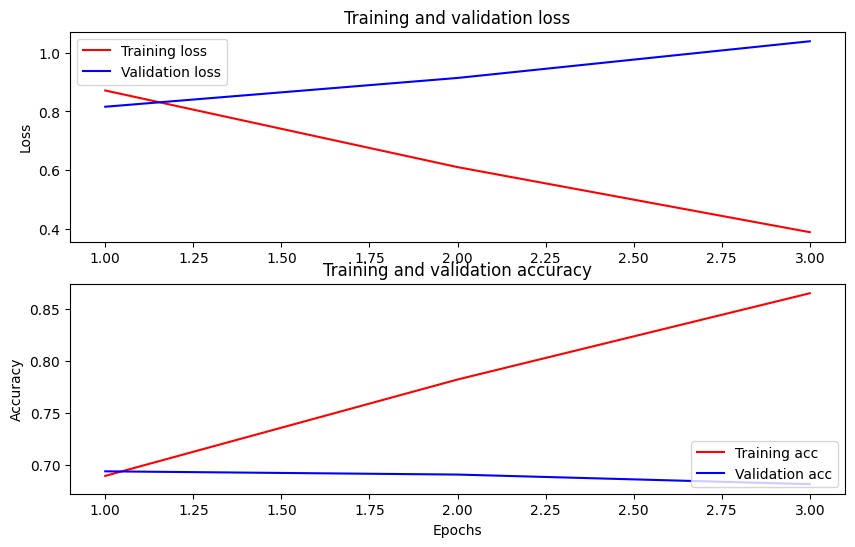

In [ ]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['sparse_categorical_accuracy']
val_acc = history_dict['val_sparse_categorical_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
dataset_name = 'feelnet-BETTER-ROBERTA-3-augmented-weights'
saved_model_path = './{}_huggingface'.format(dataset_name.replace('/', '_'))

model.save(saved_model_path, include_optimizer=True)

INFO:tensorflow:Assets written to: ./feelnet-BETTER-ROBERTA-3-augmented-weights_huggingface/assets


INFO:tensorflow:Assets written to: ./feelnet-BETTER-ROBERTA-3-augmented-weights_huggingface/assets


In [ ]:
model.save_pretrained('./better-roberta_3_augmented-weights_finetuned_model')
tokenizer.save_pretrained('./better-roberta_3_augmented-weights_finetuned_model')

('./better-roberta_3_augmented-weights_finetuned_model/tokenizer_config.json',
 './better-roberta_3_augmented-weights_finetuned_model/special_tokens_map.json',
 './better-roberta_3_augmented-weights_finetuned_model/vocab.json',
 './better-roberta_3_augmented-weights_finetuned_model/merges.txt',
 './better-roberta_3_augmented-weights_finetuned_model/added_tokens.json',
 './better-roberta_3_augmented-weights_finetuned_model/tokenizer.json')

In [ ]:
print(saved_model_path)

./feelnet-BETTER-ROBERTA-3-augmented-weights_huggingface


In [ ]:
## Recuperar el modelo guardado con model.save
reloaded_model = tf.saved_model.load(saved_model_path)

In [ ]:
## Recuperar el modelo guardado con save_pretrained
reloaded_tokenizer = AutoTokenizer.from_pretrained('./better-roberta_3_augmented-weights_finetuned_model')
reloaded_model = TFAutoModelForSequenceClassification.from_pretrained('./better-roberta_3_augmented-weights_finetuned_model')